Sample
* A subset from a larger population

Population
* The larger data set or idea of a data set

N (n)
* The size of the population (sample)

Random Sampling
* Drawing elements into a sample at random

Stratified Sampling
* Dividing the population into a strata and randomly sampling from each strata.

Stratum
* A homonegeneous subgroup of a population with common characteristics

Simple random sample
* The sample that results from random sampling without stratification

Bias
* Systematic error in the sample

Sample Bias
* A sample that misrepresents the population.

Sample mean
* the symbol $$(\bar{x})$$ is the sample mean, whereas the population mean is $$(\mu)$$

Selection Bias
* Selectively choosing the data that supports a hypothesis.

Data snooping
* Bias resulting from the way in which observations are selected.

Vast search effect
* Bias resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

Regression to the Mean
* Phenomenon involving successive measurements on a given variable, extreme observations tend to be followed by more central ones.
* For example; if a student scores 100% on a test, they are likely to score lower on the next test.

Sample statistic
* A metric calculated for a sample of data drawn from a larger population. The distribution is likely to be more regular and bell-shaped than the distribution of the data itself.

Data Distribution
* The frequency distribution of individual values in a data set.

Sampling Distribution
* The frequency distribution of a sample statistic over many samples.

Central limit theorem
* The tendency of the sampling distribution to take on a normal shape as the size rises.

Standard error
* The variability or standard deviation of sample statistic over many sample samples.

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [119]:
df = pd.read_csv('/home/satire/PycharmProjects/Statistics/csv/Top 100 tiktokers in 2025.csv', delimiter=',', encoding='latin1')
df

,Rank,Username,Followers,Following,Uploads,Likes
0,1,Khabane lame,162400000,78,1251,2500000000
1,2,charli d'amelio,155700000,1304,2812,11800000000
2,3,MrBeast,107500000,362,394,1100000000
3,4,Bella Poarch,94300000,649,771,2400000000
4,5,Addison Rae,88500000,1,318,5200000000
...,...,...,...,...,...,...
95,96,Arnaldo Mangini,32300000,105,2052,251800000
96,97,Fujiiian,32300000,464,1571,1900000000
97,98,Surthycooks,32300000,176,1242,918400000
98,99,Faisal shaikh,3200000,0,456,2000000000


In [120]:
max_registrations = len(df['Followers'])
print(max_registrations)

100


In [121]:
df.columns

Index(['Rank', 'Username', 'Followers', 'Following', 'Uploads', 'Likes'], dtype='object')

In [122]:
df.isna().sum()

Rank         0
Username     0
Followers    0
Following    0
Uploads      0
Likes        0
dtype: int64

In [123]:
sample_data = pd.DataFrame({
    'Followers': df['Followers'].sample(10),
    'Type': 'Data',
})
sample_data

,Followers,Type
65,37500000,Data
61,37900000,Data
23,54800000,Data
80,34500000,Data
42,43600000,Data
94,32400000,Data
59,38900000,Data
91,32700000,Data
64,37700000,Data
97,32300000,Data


In [124]:
sample_mean_05 = pd.DataFrame({
    'Followers': [df['Followers'].sample(5).mean() for i in range(10)],
    'Type': 'Mean of 5',
})
sample_mean_05

,Followers,Type
0,127240000.6,Mean of 5
1,40880000.0,Mean of 5
2,38040000.0,Mean of 5
3,54480000.0,Mean of 5
4,44400000.0,Mean of 5
5,55480000.0,Mean of 5
6,43820000.0,Mean of 5
7,37780000.0,Mean of 5
8,55760000.0,Mean of 5
9,69180000.0,Mean of 5


In [125]:
sample_mean_20 = pd.DataFrame({
    'Followers': [df['Followers'].sample(20).mean() for i in range(10)],
    'Type': 'Mean of 20',
})
sample_mean_20

,Followers,Type
0,4.875000e+07,Mean of 20
1,5.489000e+07,Mean of 20
2,1.016950e+08,Mean of 20
3,5.202500e+07,Mean of 20
4,7.104500e+07,Mean of 20
5,7.543500e+07,Mean of 20
6,6.003500e+07,Mean of 20
7,3.879500e+07,Mean of 20
8,4.855500e+07,Mean of 20
9,4.721500e+07,Mean of 20


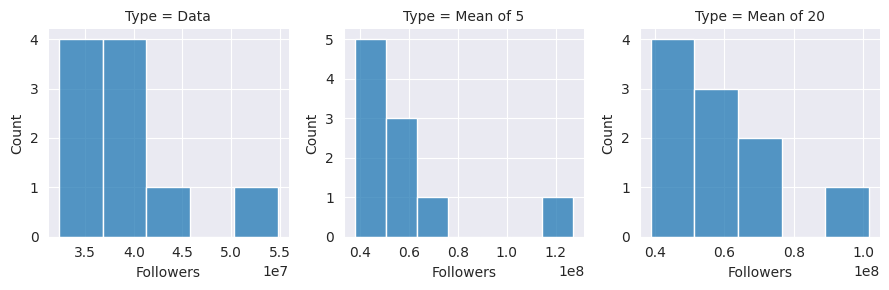

In [126]:
data = pd.concat([sample_data, sample_mean_05, sample_mean_20])
g = sns.FacetGrid(data, col="Type", sharex=False, sharey=False)
g.map(sns.histplot, "Followers")
plt.show()

Central Limit Theorem
* The mean drawn from multiple samples will resemble the familiar bell-shaped normal curve as the sample size increases. Allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference (confidence intervals, hypothesis tests).

Standard Error
* Is a single metric that sums up the variability in the sampling distribution for a statistic. The standard error can be estimated using a statistic based on the standard deviation of the sample and the sample size.
* Formula
$$SE = \frac{s}{\sqrt{n}}$$
* As the sample size increases, the standard error decreases.
* Square root of the sample size is referred to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4.
* Collect a number of brand-new samples from the population
* For each new sample, calculate the mean.
* Calculate the standard deviation of the statistics from the new samples and use this as an estimate of the standard error.

The Bootstrap
* One way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples with replacement from the sample itself and recalculate the statistic or model for each new sample.

* Bootstrap sample
* A sample taken with replacement from an observed data set.
* Resampling
* The process of taking repeated samples from observed data involves bootstrapping and permutation tests.

* Draw a sample value, record it, and replace it.
* Repeat n times.
* Record the mean of the n resampled values.
* Repeated steps 1-3 R(number of iterations of the bootstrap) times.
* Use the R results to calculate the standard deviation and produce a histogram or boxplot and find a confidence interval.

In [128]:
results = []
for nrepeat in range(1000):
    sample = resample(df['Followers'])
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {df["Followers"].median()}')
print(f'bias: {results.mean() - df["Followers"].median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 40850000.0
bias: 469400.0
std. error: 1485604.47652148
